#  Braking Distance Estimation using OLS Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
df=pd.read_csv('BrakingDistance.csv')

In [6]:
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [10]:
xbar=np.mean(df.speed)
ybar=np.mean(df.dist)
beta1=np.sum((df.dist-ybar)*(df.speed-xbar))/np.sum((df.speed-xbar)**2)
beta0=ybar-beta1*df.speed
pred_mannual=beta0+beta1*df.speed

In [11]:
#OLS

In [12]:

# Method 1

In [19]:
formula='dist~speed'

In [20]:
lm=smf.ols(formula=formula, data=df).fit()

In [21]:
lm.params

Intercept   -17.579095
speed         3.932409
dtype: float64

In [23]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.49e-12
Time:                        16:07:08   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

In [25]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


In [26]:
0.80689**2

0.6510714721

In [27]:
-17.5791 /6.758 

-2.601228174015981

In [29]:
stats.t.cdf(-2.601228174015981, df=48)*2

0.012313477095041565

In [30]:
pred_method1=lm.predict(df)

In [31]:
pred_method1

0     -1.849460
1     -1.849460
2      9.947766
3      9.947766
4     13.880175
5     17.812584
6     21.744993
7     21.744993
8     21.744993
9     25.677401
10    25.677401
11    29.609810
12    29.609810
13    29.609810
14    29.609810
15    33.542219
16    33.542219
17    33.542219
18    33.542219
19    37.474628
20    37.474628
21    37.474628
22    37.474628
23    41.407036
24    41.407036
25    41.407036
26    45.339445
27    45.339445
28    49.271854
29    49.271854
30    49.271854
31    53.204263
32    53.204263
33    53.204263
34    53.204263
35    57.136672
36    57.136672
37    57.136672
38    61.069080
39    61.069080
40    61.069080
41    61.069080
42    61.069080
43    68.933898
44    72.866307
45    76.798715
46    76.798715
47    76.798715
48    76.798715
49    80.731124
dtype: float64

Text(0, 0.5, 'Distance')

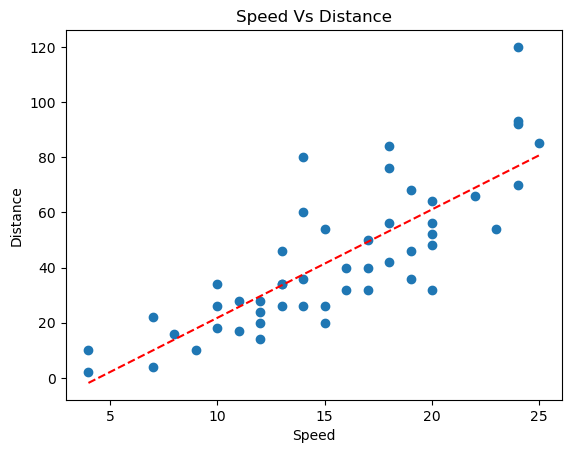

In [33]:
plt.scatter(df.speed,df.dist)
plt.plot(df.speed, pred_method1, '--', color='r')
plt.title('Speed Vs Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')

In [34]:
#-17.6+3.9*x
-17.6+3.9*0

-17.6

In [35]:
#-17.6+3.9*x
-17.6+3.9*10

21.4

In [36]:
#Method2

In [37]:
X=df.speed
Y=df.dist

In [41]:
model=sm.OLS(Y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):                    9.23e-26
Time:                        16:15:41   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
X2=sm.add_constant(X)
model=sm.OLS(Y,X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.49e-12
Time:                        16:16:53   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0

In [45]:
pred_method2=model.predict(X2)

Text(0, 0.5, 'Distance')

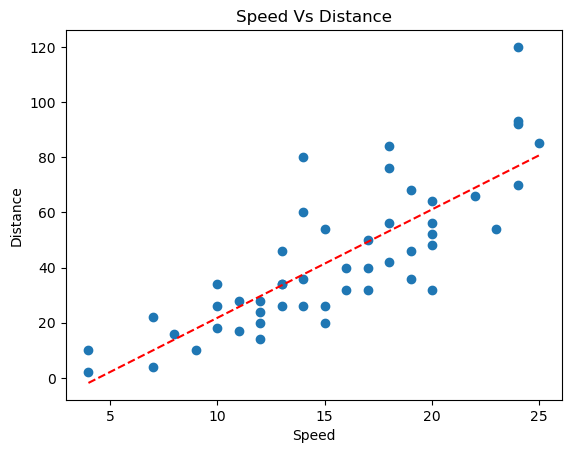

In [46]:
plt.scatter(df.speed,df.dist)
plt.plot(df.speed, pred_method2, '--', color='r')
plt.title('Speed Vs Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')

In [47]:
#The End